# **Figure 1.** DDD
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 4/24/2022|

## DDD

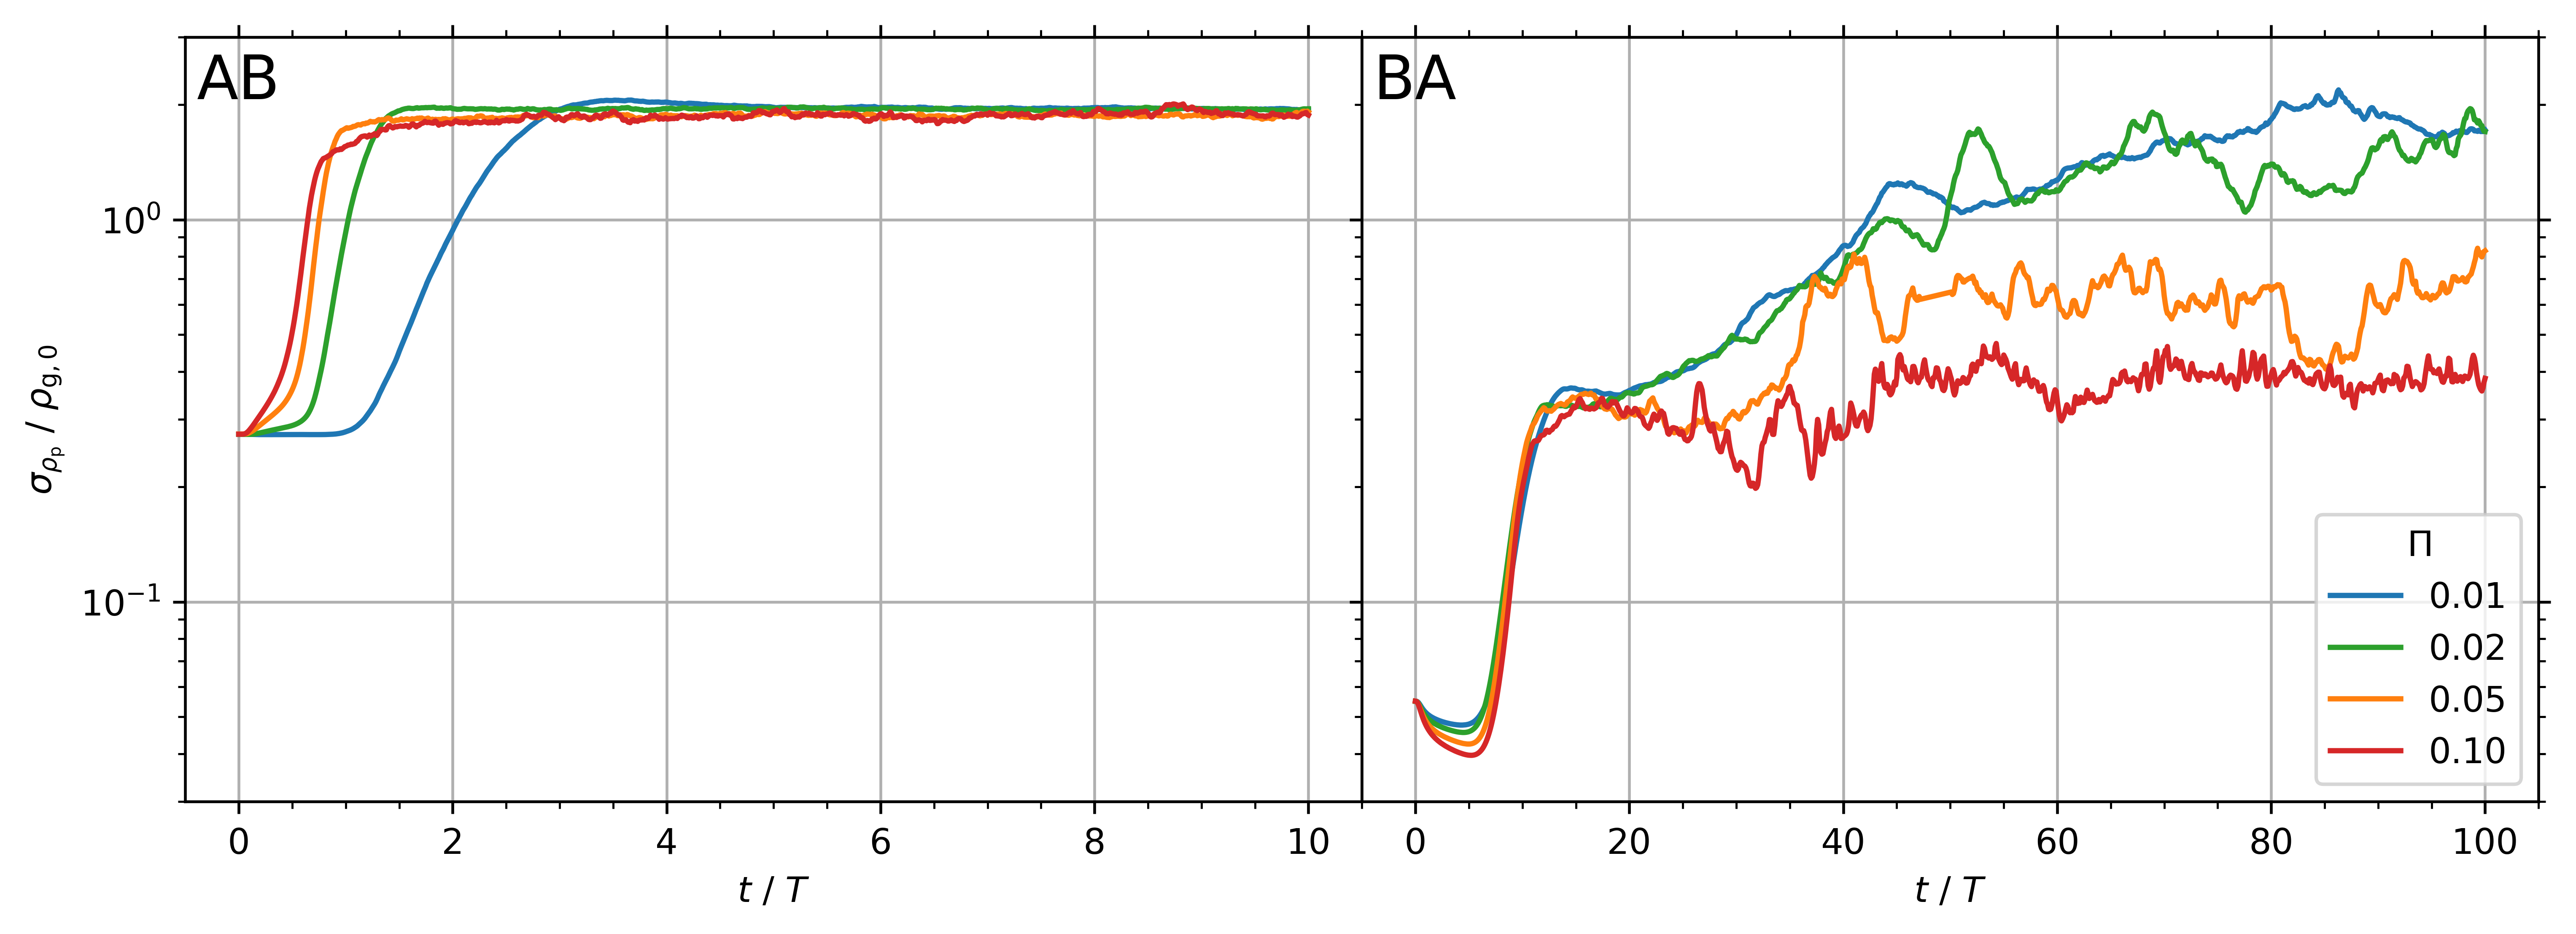

In [15]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np

dpi = 600
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12,4), dpi=dpi)
pwd = '../unstrat/'
runs = ['AB', 'BA']
Pis = [['0.01', 'tab:blue'], ['0.02', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.10', 'tab:red']]
res = '2048'

for i,run in enumerate(runs):
    for Pi in Pis:
        hst = athena_read.hst(pwd+'%s/%s/%s/output/SI.hst'\
                              %(run, Pi[0], res))
        rhop_amps = np.sqrt(hst['drhop2'] - hst['drhop']**2)

        axs[i].semilogy(hst['time'], rhop_amps, color=Pi[1], label=Pi[0])
    
    axs[i].grid()
    axs[i].minorticks_on()
    axs[i].set(xlabel=r'$t$ / $T$')
    axs[i].text(0.01, 0.98, run, ha='left', va='top', size='xx-large',
                transform=axs[i].transAxes)
    axs[i].tick_params(which='both', top=True, right=True)

axs[1].legend(loc='lower right', title=r'$\Pi$')
axs[0].set(ylim=(3e-2, 3e-0),
           ylabel=r'$\sigma_{\rho_\mathrm{p}}$ / $\rho_\mathrm{g,0}$')
plt.subplots_adjust(wspace=0)
# plt.savefig('figs/ddd.pdf', bbox_inches='tight', pad_inches=0.01)
plt.savefig('figs/ddd_poster.png', bbox_inches='tight', pad_inches=0.01)